In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

분석 전 게임 정보
- 경매장에서 거래되는 아이템들이 다른 서버 유저와 거래 가능 -> 서버 별 df 분리 X
- 직업 별 착용 아이템이 다름 -> 직업 별로 df 분리

## 유저 정보 데이터 전처리
- 'slotId'
- 'slotName'
- 'itemId'
- 'itemName'
- 'clone_itemId'
- 'clone_itemName'


12개의 파츠 속성중 7개 속성 선정</br>


### 데이터 불러오기

In [3]:
output1 = pd.read_csv("output1.csv")
output2 =pd.read_csv("output2.csv")
output3 =pd.read_csv("output3.csv")

data = pd.concat([output1,output2,output3],ignore_index=True)

del output1,output2,output3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\1574544667.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\1574544667.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output3 =pd.read_csv("output3.csv")


In [4]:
data

,Unnamed: 0,characterId,characterName,level,jobId,jobGrowId,jobName,jobGrowName,adventureName,guildId,...,SKIN__avatar_clone_random_itemId,SKIN__avatar_clone_random_itemName,SKIN__avatar_clone_random_optionAbility,SKIN__avatar_clone_random_emblems_slotNo,SKIN__avatar_clone_random_emblems_slotColor,SKIN__avatar_clone_random_emblems_itemName,SKIN__avatar_clone_random_emblems_itemRarity,_error_status,_error_code,_error_message
0,0,150a23219a59e086e36db59028c06a50,헤롱카테,110.0,3909d0b188e9c95311399f776e331da5,92da05ec93fb43406e193ffb9a2a629b,마법사(여),眞 인챈트리스,자색나비,ab001e5cfdc5b0669ca7219cc565c457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0daa8c49cae531262f966dd637008e30,민트크림소스,110.0,3909d0b188e9c95311399f776e331da5,618326026de1a1f1cfba5dbd0b8396e7,마법사(여),眞 소환사,민초국밥,9f0b4ac443f5712e73eb6bcccad9717d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,110.0,afdf3b989339de478e85b614d274d1ef,618326026de1a1f1cfba5dbd0b8396e7,거너(남),眞 런처,천계특수화기부대,a79e1391ef2cd5e62229cfb78138d22e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,110.0,41f1cdc2ff58bb5fdc287be0db2a8df3,6d459bc74ba73ee4fe5cdc4655400193,귀검사(남),眞 버서커,피쟁이,c19a3bbfb1340959f183d36db76c89bb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,110.0,0c1b401bb09241570d364420b3ba3fd7,37495b941da3b1661bc900e68ef3b2c6,프리스트(여),眞 크루세이더,13증,e37fa9b710815cb231c240a3dc93fbc1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90595,30195,5c37706a64742ce164d02b06456ec3d9,윤아에용,110.0,a7a059ebe9e6054c0644b40ef316d6e9,618326026de1a1f1cfba5dbd0b8396e7,격투가(여),眞 스트라이커,정윤아에요,0a21d7379c21af0039c47ca04ec75c35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90596,30196,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,110.0,41f1cdc2ff58bb5fdc287be0db2a8df3,37495b941da3b1661bc900e68ef3b2c6,귀검사(남),眞 웨펀마스터,그림쟁이,9d72e476fb1dc1e50ae002712cd8c67e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90597,30197,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,110.0,3909d0b188e9c95311399f776e331da5,92da05ec93fb43406e193ffb9a2a629b,마법사(여),眞 인챈트리스,숲속거미,c1909e07988d3fc6384e8dfa811bb0a0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90598,30198,9c068b798696f994d39b14a0840abb10,찌뮤,110.0,b9cb48777665de22c006fabaf9a560b3,37495b941da3b1661bc900e68ef3b2c6,아처,眞 뮤즈,쪼꼬매져쪄,88e23efa4cff2f1e563b9e89711ab26e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 칼럼명 정의

In [5]:
name = ['HEADGEAR'
,'HAIR'
,'FACE'
,'JACKET'
,'PANTS'
,'SHOES'
,'BREAST'
,'WAIST'
,'SKIN'
,'AURORA'
,'WEAPON'
,'AURA_SKIN']

In [6]:
columns = ['characterId',
'characterName',
'jobId',
'jobName',
'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',

'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',

'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',

'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',

'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',

'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',

'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',

'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',

'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',

'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',

'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',

'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',

'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName']

### 칼럼명 변경

In [7]:
df = data[columns]

In [8]:
len(columns)

76

In [9]:
len(df.columns)

76

### 이상치 검색

#### 1. characterName이 없는 데이터

In [10]:
df['characterName'].isnull().sum()

2

In [11]:
for i in range(len(df)):
    if df['characterName'].isnull()[i]:
        print(i)

20141
78245


In [12]:
df.drop([20141,78245], axis=0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9896\2828580222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([20141,78245], axis=0, inplace=True)


In [13]:
df.iloc[109]

characterId                         c2e09c4861fbe6fa2999ffaaa8cc1cf8
characterName                                                   하울이;
jobId                               a5ccbaf5538981c6ef99b236c0a60b73
jobName                                                       마법사(남)
HEADGEAR__avatar_slotId                                     HEADGEAR
                                                  ...               
AURA_SKIN__avatar_slotName                                 오라 스킨 아바타
AURA_SKIN__avatar_itemId            f99513274bbef4290a1379c223933338
AURA_SKIN__avatar_itemName                                조화가 무너진 기억
AURA_SKIN__avatar_clone_itemId                                   NaN
AURA_SKIN__avatar_clone_itemName                                 NaN
Name: 109, Length: 76, dtype: object

>> api로 받아오는 과정 사이 캐릭터 삭제 추정 (2개) -> 데이터 삭제

### 직업별 df 분리
- '다크나이트' 와 '귀검사(남)' , '크리에이터' 와 '마법사(여)' 는 아바타를 같은 것 사용
- 오라는 직업 구분 없음


In [42]:
jobdf = df['jobName'].value_counts()
jobdf=jobdf.sort_index()
jobdf

jobName
거너(남)       5780
거너(여)       3898
격투가(남)      2165
격투가(여)      5625
귀검사(남)      9543
귀검사(여)     10355
나이트         3235
다크나이트        556
도적          2435
마법사(남)      2182
마법사(여)     12891
마창사         1734
아처         11764
총검사         2141
크리에이터        288
프리스트(남)     6080
프리스트(여)     9926
Name: count, dtype: int64

#### 직업별 분포

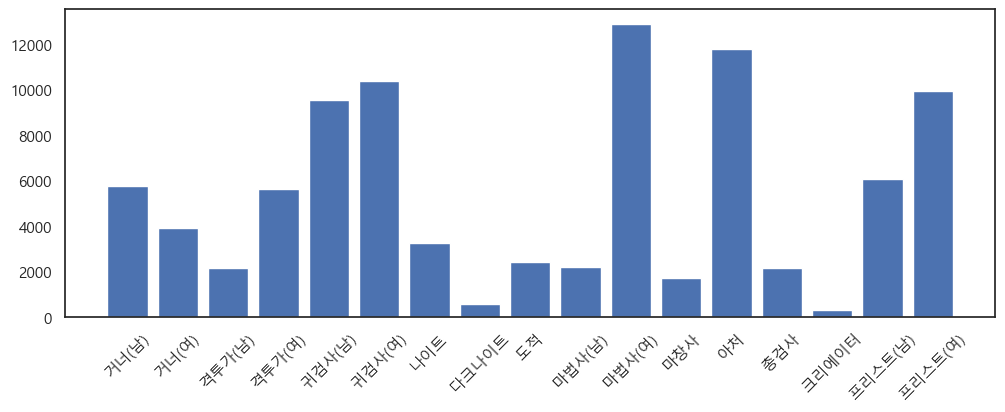

In [43]:
plt.figure(figsize=(12,4))
plt.bar(jobdf.index, jobdf.values)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=45)
plt.show()

In [48]:
joblist = list(df['jobName'].unique())


거너(남) : GunnerM</br>
거너(여) : GunnerW</br>
격투가(남) : FighterM</br>
격투가(여) : FighterW</br>
귀검사(남) : Ghost KnightM</br>
귀검사(여) : Ghost KnightW</br>
나이트 : Knight</br>
다크나이트 : Dark Knight</br>
도적 : Thief</br>
마법사(남) : MageM</br>
마법사(여) : MageW</br>
마창사 : Demonic Lancer</br>
아처 : Archer</br>
총검사 : Gunblader</br>
크리에이터 : Creator</br>
프리스트(남) : PriestM</br>
프리스트(여) : PriestW</br>

In [46]:
GunnerM = df[df['jobName']=='거너(남)']
GunnerW = df[df['jobName']=='거너(여)']
FighterM = df[df['jobName']=='격투가(남)']
FighterW = df[df['jobName']=='격투가(여)']
GhostknightM = df[df['jobName']=='귀검사(남)']
GhostknightW = df[df['jobName']=='귀검사(여)']
Knight = df[df['jobName']=='나이트']
Darkknight = df[df['jobName']=='다크나이트']
Thief = df[df['jobName']=='도적']
MageM = df[df['jobName']=='마법사(남)']
MageW = df[df['jobName']=='마법사(여)']
Demoniclancer = df[df['jobName']=='마창사']
Archer = df[df['jobName']=='아처']
Gunblader = df[df['jobName']=='총검사']
Creator = df[df['jobName']=='크리에이터']
PriestM = df[df['jobName']=='프리스트(남)']
PriestW = df[df['jobName']=='프리스트(여)']